In [2]:
import pandas as pd
import numpy as np
import matplotlib as plt
import matplotlib.dates as mdates
from matplotlib.dates import DateFormatter

In [3]:
# load df, convert year to date/time and view
df = pd.read_csv("540_project_df.csv", parse_dates=['year'])
df.head()

,race,sex,year,salary_no,num_none,std_none,salary_hs,num_hs,std_hs,salary_2yr,num_2yr,std_2yr,salary_4yr,num_4yr,std_4yr,salary_6yr,num_6yr,std_6yr
0,white,Male,2018-01-01,32458.0,6098.00,838.00,47199.0,19815.00,625.00,54482.0,18546.00,847.00,87842.0,16080.00,1263.00,125533.0,8516.00,2358.00
1,white,Male,2017-01-01,32096.0,6277.00,649.00,46284.0,19933.00,528.00,51974.0,18724.00,538.00,83478.0,15913.00,837.00,122160.0,8373.00,1892.00
2,white,Male,2016-01-01,33153.0,6255.00,883.00,45390.0,19941.00,546.00,50063.0,18951.00,510.00,84069.0,15136.00,961.00,116854.0,8211.00,1734.00
3,white,Male,2015-01-01,31336.0,6755.00,748.00,43711.0,19807.00,472.00,47900.0,18905.00,454.00,82495.0,14884.00,1005.00,115094.0,8257.00,1708.00
4,white,Male,2014-01-01,30342.0,6858.00,780.00,41492.0,19815.00,381.00,48405.0,18518.00,562.00,78348.0,14409.00,886.00,112351.0,7864.00,1706.00


In [4]:
# Only show year from datetime
df['year'] = pd.DatetimeIndex(df['year']).year

In [5]:
# subset features
shortdf = df[['race', 'sex', 'year', 'salary_no', 'salary_hs', 'salary_2yr',
                 'salary_4yr', 'salary_6yr']]
shortdf

,race,sex,year,salary_no,salary_hs,salary_2yr,salary_4yr,salary_6yr
0,white,Male,2018,32458.0,47199.0,54482.0,87842.0,125533.0
1,white,Male,2017,32096.0,46284.0,51974.0,83478.0,122160.0
2,white,Male,2016,33153.0,45390.0,50063.0,84069.0,116854.0
3,white,Male,2015,31336.0,43711.0,47900.0,82495.0,115094.0
4,white,Male,2014,30342.0,41492.0,48405.0,78348.0,112351.0
...,...,...,...,...,...,...,...,...
289,Hispanic,Female,1979,4675.0,6708.0,7069.0,9168.0,13313.0
290,Hispanic,Female,1978,4135.0,5834.0,6686.0,9684.0,10908.0
291,Hispanic,Female,1977,3707.0,5466.0,5588.0,9082.0,10569.0
292,Hispanic,Female,1976,3537.0,5124.0,5075.0,6884.0,9218.0


In [6]:
# rename features
shortdf = shortdf.rename(columns={"salary_no": "no_deg", "salary_hs": "hs_deg",
                        "salary_2yr": "2yr_deg", "salary_4yr": "4yr_deg",
                        "salary_6yr": "6yr_deg"})

In [7]:
# check for duplicates
duplicate = shortdf[shortdf.duplicated(keep = 'last')]
print('There are',len(duplicate),'duplicated rows')

There are 0 duplicated rows


In [8]:
# check for null values
shortdf.isnull().values.any()

False

In [9]:
# group subset data by annual mean incomes
yr_degree = shortdf.groupby('year').mean()
yr_degree.head()

,no_deg,hs_deg,2yr_deg,4yr_deg,6yr_deg
year,,,,,
1975,5590.400000,7325.400000,7611.200000,10665.200000,13872.8
1976,6060.400000,7906.200000,7894.400000,11407.400000,14976.4
1977,6402.000000,8633.000000,8793.200000,12704.000000,15945.4
1978,7045.600000,9270.600000,9871.800000,14181.400000,17146.4
1979,7081.666667,9432.833333,10240.333333,14477.833333,18422.5


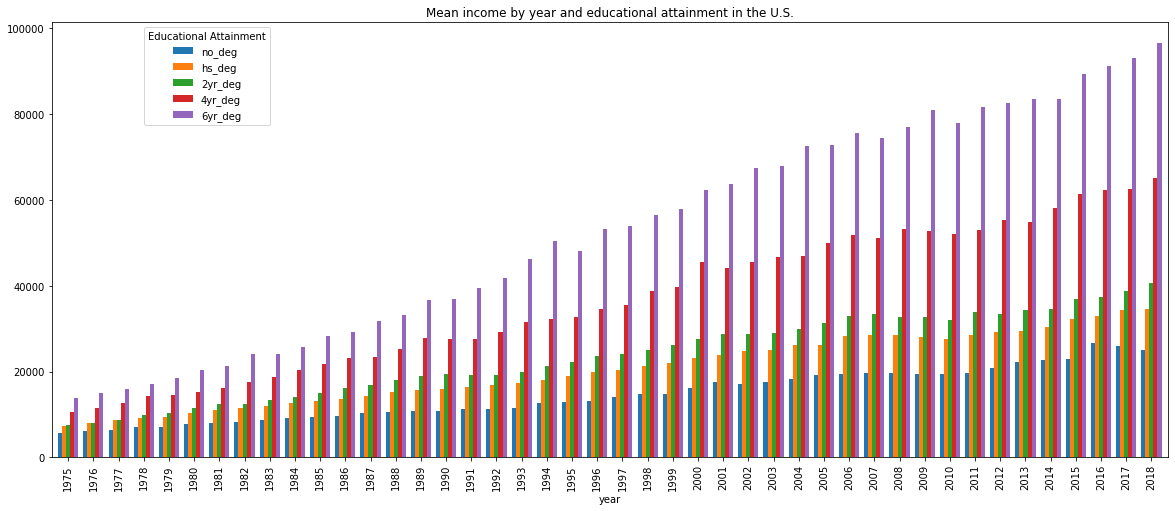

In [10]:
# plot bar graph showing income by education each year
yr_degree.plot(kind='bar', width=0.8, figsize=(20,8),
               title='Mean income by year and educational attainment in the U.S.').legend(title='Educational Attainment',
                                                                                          bbox_to_anchor=(0.2, 1))

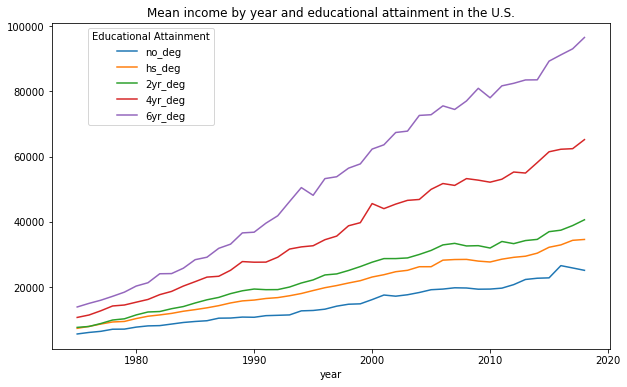

In [25]:
# plot line graph showing income by education each year
yr_degree.plot(figsize=(10,6),
               title='Mean income by year and educational attainment in the U.S.').legend(title='Educational Attainment',
                                                                                          bbox_to_anchor=(0.3, 1))

In [182]:
# index by year
shortdf.set_index('year')

,race,sex,no_deg,hs_deg,2yr_deg,4yr_deg,6yr_deg
year,,,,,,,
2018,white,Male,32458.0,47199.0,54482.0,87842.0,125533.0
2017,white,Male,32096.0,46284.0,51974.0,83478.0,122160.0
2016,white,Male,33153.0,45390.0,50063.0,84069.0,116854.0
2015,white,Male,31336.0,43711.0,47900.0,82495.0,115094.0
2014,white,Male,30342.0,41492.0,48405.0,78348.0,112351.0
...,...,...,...,...,...,...,...
1979,Hispanic,Female,4675.0,6708.0,7069.0,9168.0,13313.0
1978,Hispanic,Female,4135.0,5834.0,6686.0,9684.0,10908.0
1977,Hispanic,Female,3707.0,5466.0,5588.0,9082.0,10569.0


In [147]:
from urllib.request import urlopen
from bs4 import BeautifulSoup

In [173]:
# convert website html to dataframe
infl_df = pd.read_html('https://www.usinflationcalculator.com/inflation/consumer-price-index-and-annual-percent-changes-from-1913-to-2008/')[0]
infl_df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Annual,Percent Change,Percent Change
1,Year,Jan,Feb,Mar,Apr,May,June,July,Aug,Sep,Oct,Nov,Dec,Avg,Dec-Dec,Avg-Avg
2,1913,9.8,9.8,9.8,9.8,9.7,9.8,9.9,9.9,10.0,10.0,10.1,10.0,9.9,–,–
3,1914,10.0,9.9,9.9,9.8,9.9,9.9,10.0,10.2,10.2,10.1,10.2,10.1,10.0,1.0,1.0
4,1915,10.1,10.0,9.9,10.0,10.1,10.1,10.1,10.1,10.1,10.2,10.3,10.3,10.1,2.0,1.0


In [174]:
# drop first index
infl_df = infl_df.drop([infl_df.index[0]]) 
infl_df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
1,Year,Jan,Feb,Mar,Apr,May,June,July,Aug,Sep,Oct,Nov,Dec,Avg,Dec-Dec,Avg-Avg
2,1913,9.8,9.8,9.8,9.8,9.7,9.8,9.9,9.9,10.0,10.0,10.1,10.0,9.9,–,–
3,1914,10.0,9.9,9.9,9.8,9.9,9.9,10.0,10.2,10.2,10.1,10.2,10.1,10.0,1.0,1.0
4,1915,10.1,10.0,9.9,10.0,10.1,10.1,10.1,10.1,10.1,10.2,10.3,10.3,10.1,2.0,1.0
5,1916,10.4,10.4,10.5,10.6,10.7,10.8,10.8,10.9,11.1,11.3,11.5,11.6,10.9,12.6,7.9


In [175]:
# copy row index 0 to column headers
infl_df.columns = infl_df.iloc[0]
# delete row index 0
infl_df = infl_df.drop(infl_df.index[0])
infl_df.head()

1,Year,Jan,Feb,Mar,Apr,May,June,July,Aug,Sep,Oct,Nov,Dec,Avg,Dec-Dec,Avg-Avg
2,1913,9.8,9.8,9.8,9.8,9.7,9.8,9.9,9.9,10.0,10.0,10.1,10.0,9.9,–,–
3,1914,10.0,9.9,9.9,9.8,9.9,9.9,10.0,10.2,10.2,10.1,10.2,10.1,10.0,1.0,1.0
4,1915,10.1,10.0,9.9,10.0,10.1,10.1,10.1,10.1,10.1,10.2,10.3,10.3,10.1,2.0,1.0
5,1916,10.4,10.4,10.5,10.6,10.7,10.8,10.8,10.9,11.1,11.3,11.5,11.6,10.9,12.6,7.9
6,1917,11.7,12.0,12.0,12.6,12.8,13.0,12.8,13.0,13.3,13.5,13.5,13.7,12.8,18.1,17.4


In [176]:
# convert objects to numeric
infl_df['Year'] = pd.to_numeric(infl_df['Year'])
infl_df['Avg'] = pd.to_numeric(infl_df['Avg'])

In [177]:
# filter matching years only
infl_df = infl_df.loc[(infl_df['Year'] >= 1975) & (infl_df['Year'] <= 2018)]

In [178]:
short_infl_df = infl_df[['Year','Avg']]

In [179]:
# index by year
short_infl_df.set_index('Year')

1,Avg
Year,
1975,53.800
1976,56.900
1977,60.600
1978,65.200
1979,72.600
1980,82.400
1981,90.900
1982,96.500
1983,99.600


In [188]:
# merge website and flat dataframes by year
new_df = short_infl_df.join(shortdf)

In [190]:
# rename Avg column for clarity
new_df = new_df.rename(columns={"Avg": "cost living"})

In [191]:
new_df.head()

,Year,cost living,race,sex,year,no_deg,hs_deg,2yr_deg,4yr_deg,6yr_deg
64,1975,53.8,white,Female,1998,11255.0,18327.0,21246.0,31406.0,45462.0
65,1976,56.9,white,Female,1997,10700.0,17166.0,19892.0,30041.0,43236.0
66,1977,60.6,white,Female,1996,10290.0,16270.0,18482.0,28667.0,42049.0
67,1978,65.2,white,Female,1995,9582.0,16196.0,18011.0,26916.0,37864.0
68,1979,72.6,white,Female,1994,9220.0,15078.0,16998.0,26198.0,39816.0
